# Importing required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Imported liberies details

# Loading Dataset

In [ ]:
data = pd.read_csv("diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# EDA

# Random Display

In [ ]:
data.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
194,8,85,55,20,0,24.4,0.136,42,0
21,8,99,84,0,0,35.4,0.388,50,0
718,1,108,60,46,178,35.5,0.415,24,0
755,1,128,88,39,110,36.5,1.057,37,1
731,8,120,86,0,0,28.4,0.259,22,1
753,0,181,88,44,510,43.3,0.222,26,1
366,6,124,72,0,0,27.6,0.368,29,1
532,1,86,66,52,65,41.3,0.917,29,0
207,5,162,104,0,0,37.7,0.151,52,1
202,0,108,68,20,0,27.3,0.787,32,0


# Shape of Dataset

In [ ]:
data.shape

(768, 9)

# Dataset Column

In [ ]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# Column List

In [ ]:
colnames = list(data.columns)
colnames

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

# Data Plot

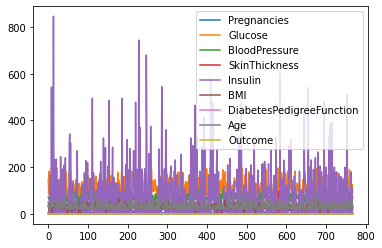

In [ ]:
data.plot()

# Output Column

In [ ]:
target = colnames[8]
target

'Outcome'

# Unique Value Check 

In [ ]:
data.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

# Dataset information and details

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Dataset description 

In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Checking for missing data

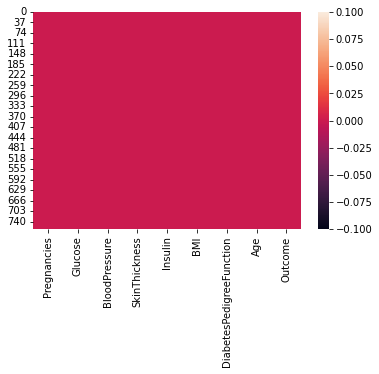

In [ ]:
sns.heatmap(data.isnull())

# Checking for null value

In [ ]:
data.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


# Null value list

In [ ]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Data Cleaning 

# Dropping off redundant data (SkinThickness,Pregnancies,BloodPressure)

In [ ]:
diabetes = data.drop(['SkinThickness','Pregnancies','BloodPressure'], axis=1)

In [ ]:
diabetes.head()

,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,0,33.6,0.627,50,1
1,85,0,26.6,0.351,31,0
2,183,0,23.3,0.672,32,1
3,89,94,28.1,0.167,21,0
4,137,168,43.1,2.288,33,1


In [ ]:
diabetes.sample(5)

,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
43,171,240,45.4,0.721,54,1
372,84,66,35.8,0.545,21,0
389,100,81,31.6,0.949,28,0
459,134,60,25.9,0.460,81,0
467,97,100,36.8,0.600,25,0


In [ ]:
diabetes.tail(75)

,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
693,129,125,38.5,0.439,43,1
694,90,0,23.5,0.191,25,0
695,142,480,30.4,0.128,43,1
696,169,125,29.9,0.268,31,1
697,99,0,25.0,0.253,22,0
...,...,...,...,...,...,...
763,101,180,32.9,0.171,63,0
764,122,0,36.8,0.340,27,0
765,121,112,26.2,0.245,30,0
766,126,0,30.1,0.349,47,1


# New Detaset Missing Value Check

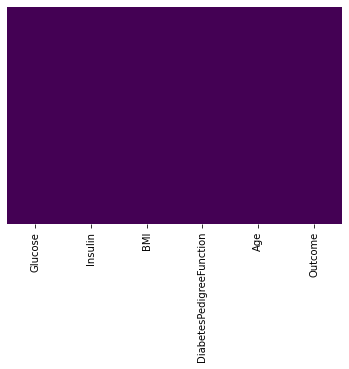

In [ ]:
sns.heatmap(diabetes.isnull(),yticklabels= False,cbar = False, cmap='viridis')

# Cleaned dataset Summery

In [ ]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   Insulin                   768 non-null    int64  
 2   BMI                       768 non-null    float64
 3   DiabetesPedigreeFunction  768 non-null    float64
 4   Age                       768 non-null    int64  
 5   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 36.1 KB


# Training & Test Split

In [ ]:
X=diabetes.drop("Outcome", axis=1)
Y=diabetes['Outcome']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
X_train

,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age
500,117,71,25.2,0.313,21
262,95,0,32.1,0.612,24
467,97,100,36.8,0.600,25
227,162,0,37.2,0.652,24
481,123,0,35.2,0.197,29
...,...,...,...,...,...
636,104,0,28.8,0.153,48
623,94,115,43.5,0.347,21
212,179,0,34.2,0.164,60
707,127,335,34.4,0.176,22


# Relationship Analysis 

# Dataset Outcome Visualization

Negative (0): 500
Positive (1): 268


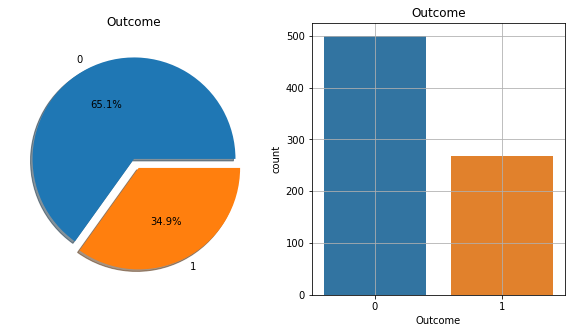

Outcome
0    500
1    268
dtype: int64


In [ ]:
f,ax=plt.subplots(1,2,figsize =(10,5))
data['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Outcome')
ax[0].set_ylabel('')
sns.countplot('Outcome',data=data,ax=ax[1])
ax[1].set_title('Outcome')
N,P = data['Outcome'].value_counts()
print('Negative (0):',N)
print('Positive (1):',P)
plt.grid()
plt.show()
print(diabetes.groupby('Outcome').size())

# Matrix Co-relation

In [ ]:
correlation = data.corr()
print(correlation)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

# Matrix Corelation Heatmap Visualization

<AxesSubplot:>

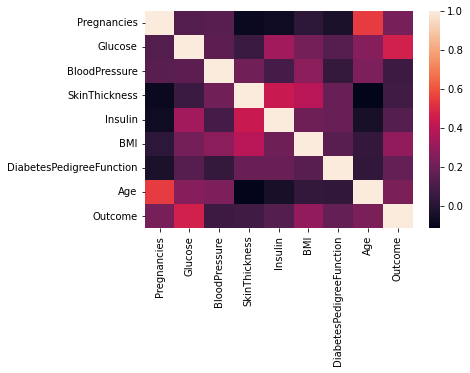

In [ ]:
sns.heatmap(correlation)

# Visualization of irrelevant variables for outcome

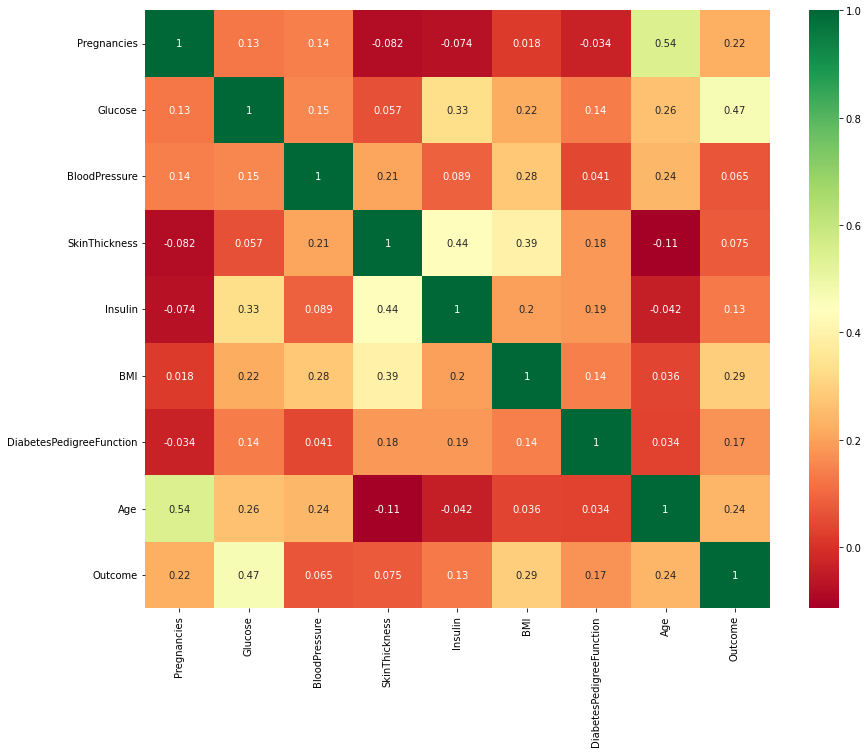

In [ ]:
import seaborn as sns
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(14,11))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap='RdYlGn')

# Matrix Co-relationship Heatmap after dropping redundant columns

<AxesSubplot:>

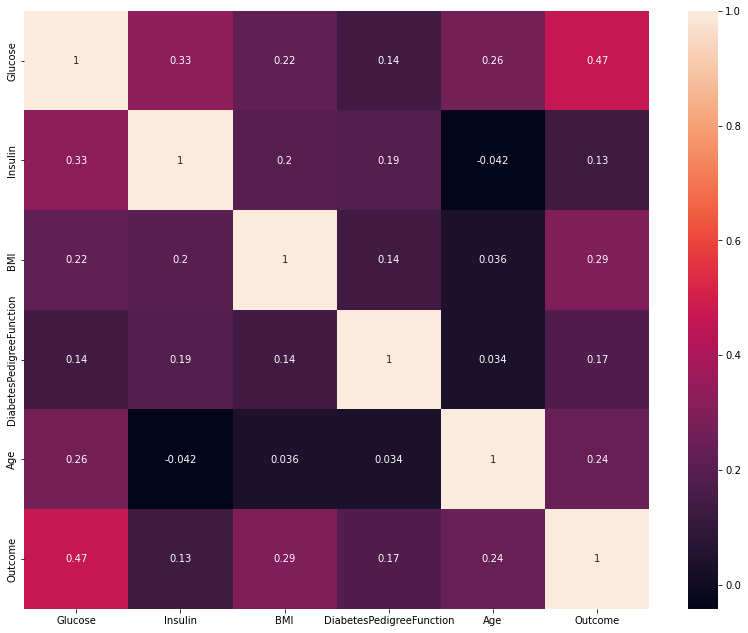

In [ ]:
Corelation = diabetes.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(14,11))
sns.heatmap(Corelation, xticklabels = Corelation.columns, yticklabels = Corelation.columns, annot = True)

# Visualization of importan variables for outcome (After Cleaning)

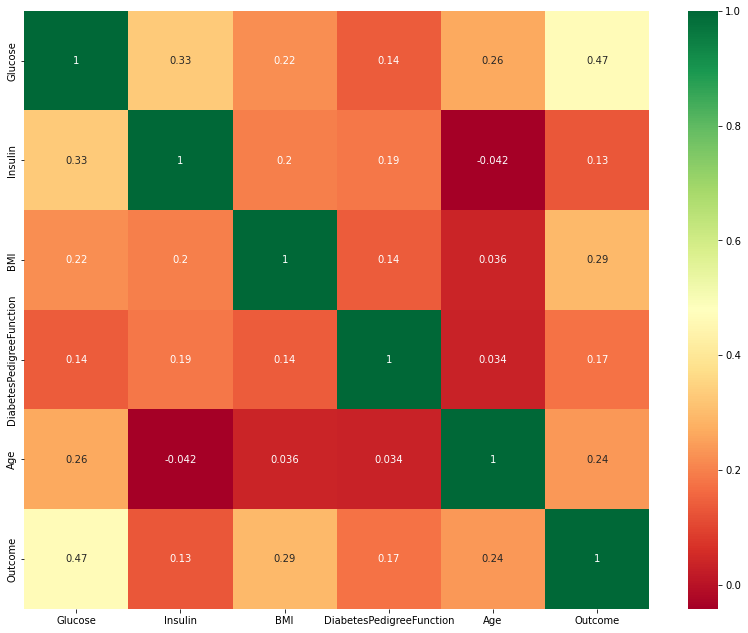

In [ ]:
import seaborn as sns
corrmat = diabetes.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(14,11))
g=sns.heatmap(diabetes[top_corr_features].corr(),annot=True,cmap='RdYlGn')

# Scatter plot

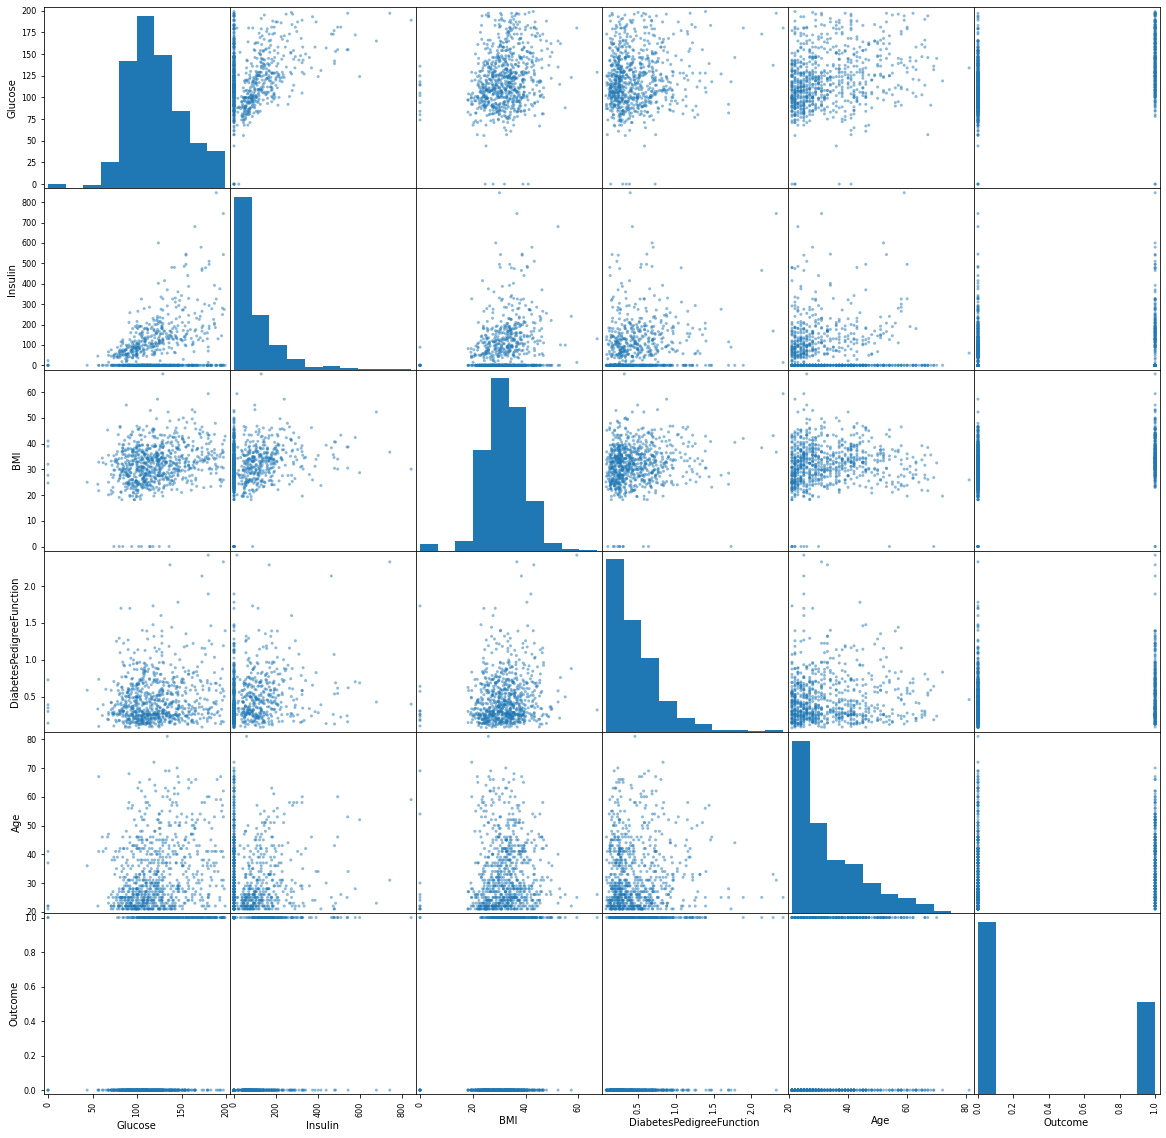

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(diabetes, figsize =(20,20));

# Pair Plot

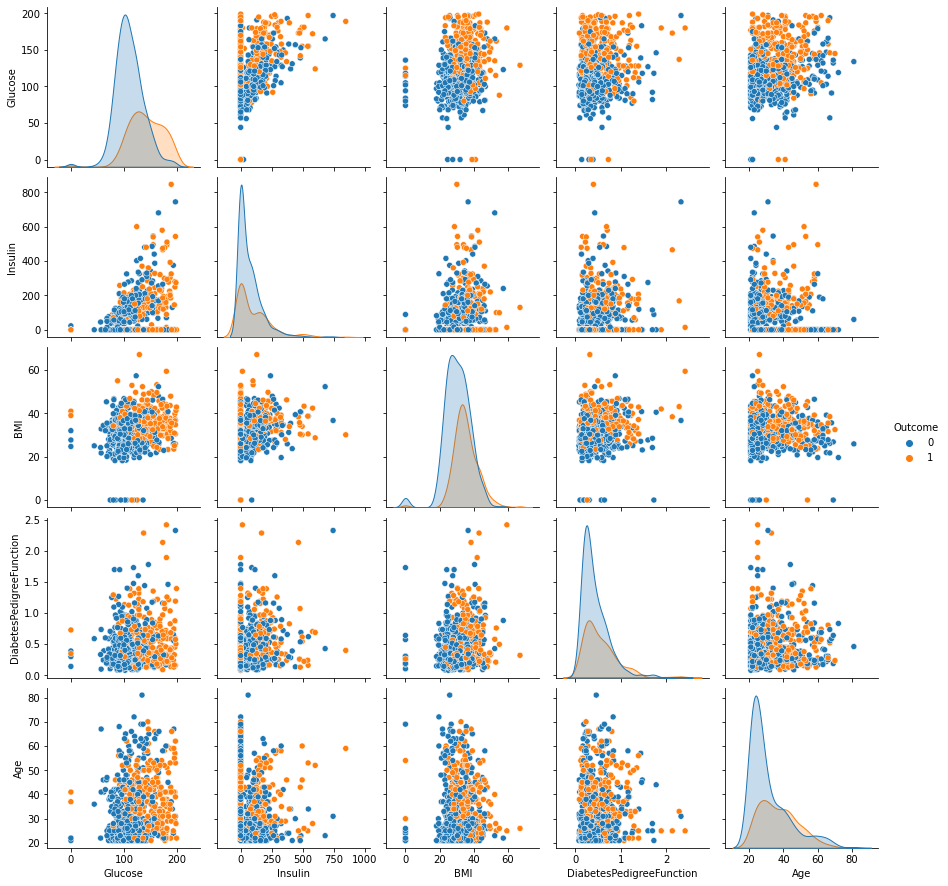

In [ ]:
sns.pairplot(data=diabetes,hue = 'Outcome')
plt.show()

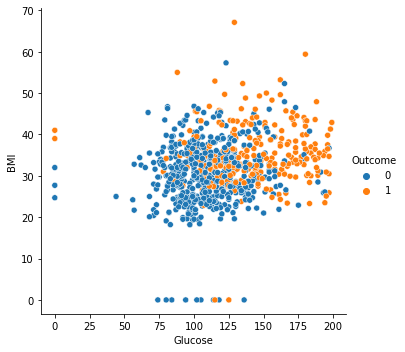

In [ ]:
sns.relplot( x = 'Glucose', y = 'BMI', hue = 'Outcome', data = diabetes)

# Histograms

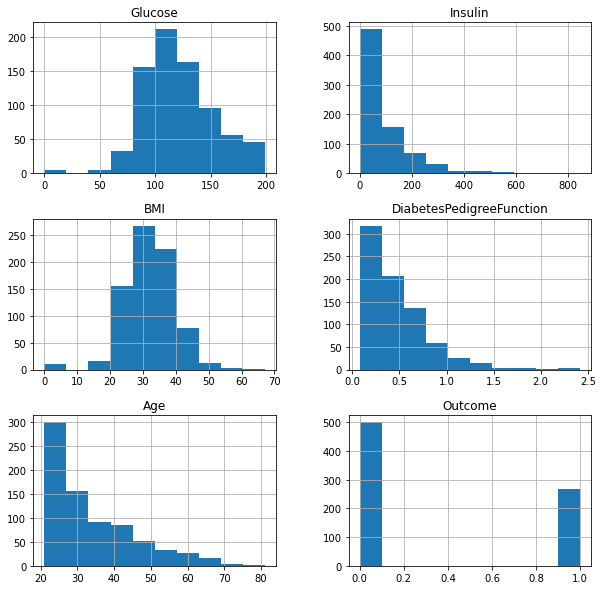

In [ ]:
diabetes.hist(bins=10,figsize=(10,10))
plt.show()

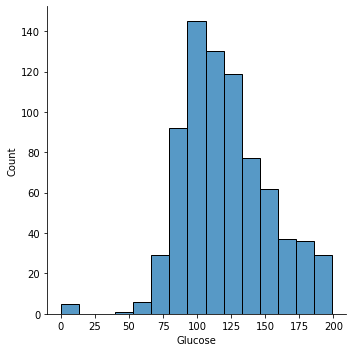

In [ ]:
sns.displot(diabetes['Glucose'], bins=15)

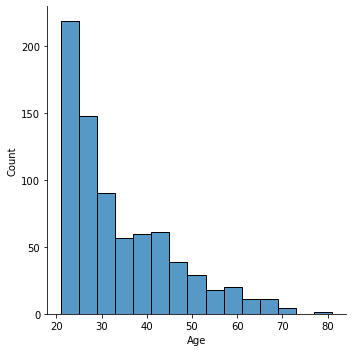

In [ ]:
sns.displot(diabetes['Age'], bins=15)

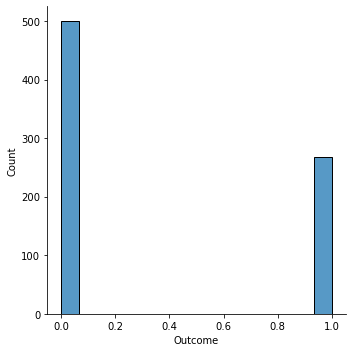

In [ ]:
sns.displot(diabetes['Outcome'], bins=15)

# Catplot Realtionship

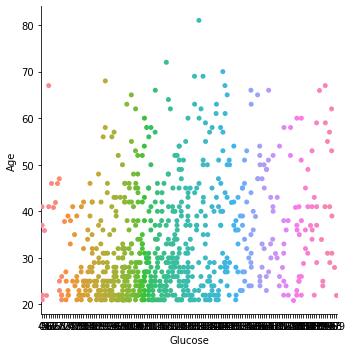

In [ ]:
sns.catplot(x='Glucose', y ='Age', data=diabetes)

# Feature Scaling 

In [ ]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaler.fit(X)
SSX = scaler.transform(X)

# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(SSX, Y, test_size=0.2, random_state=7)

In [ ]:
X_train.shape,Y_train.shape

((614, 5), (614,))

In [ ]:
X_test.shape,Y_test.shape

((154, 5), (154,))

In [ ]:
target = colnames[8]
target

'Outcome'

# Algorithms

In [ ]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(X_train,Y_train)

SVC()

# Test Data Prediction

In [ ]:
sv_pred=sv.predict(X_test)
print(sv_pred)

[0 1 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0
 1 1 0 1 0 0]


# Model Evaluation

In [ ]:
print('SVM Train Accuracy',sv.score(X_train,Y_train)*100)
print('SVM Test Accuracy',sv.score(X_test,Y_test)*100)

SVM Train Accuracy 80.45602605863192
SVM Test Accuracy 82.46753246753246
